# **PyTorch**

Es un ecosistema, pero su núcleo es la biblioteca de ndarrays que en combinación con el motor de diferenciación automática permite crear cosas como redes neuronales, solucionadores de ecuaciones en derivadas parciales y tomar esos componentes a un siguiente nivel para poder escalar a múltiples de cientos de computadoras.

* Es un reemplazo para NumPy optimizado para la potencia de las GPU:

PyTorch proporciona una estructura de datos central, _el tensor_, que es una matriz multidimensional que comparte muchas similitudes con las matrices NumPy. Sobre esa base, PyTorch viene con funciones para realizar operaciones matemáticas aceleradas en hardware, lo que hace que sea conveniente diseñar arquitecturas de redes neuronales y entrenarlas en máquinas individuales o recursos informáticos paralelos. Este tipo de dato, el **tensor**, es usado para contener números, vectores, matrices o arreglos en general. Además de proporcionar funciones para operar sobre ellos.

* PyTorch presenta una interoperabilidad perfecta con NumPy, lo que trae consigo una integración de primera clase con el resto de las
bibliotecas en Python, como [SciPy](https://www.scipy.org), [Scikit-learn](https://scikit-learn.org) y [Pandas](https://pandas.pydata.org).


*   Facilita la creación de proyectos de aprendizaje profundo ya que proporciona flexibilidad y velocidad significativas:
 proporciona un cálculo acelerado utilizando unidades de procesamiento gráfico (GPU), lo que a menudo produce aceleraciones en el rango de 50 veces más que hacer el mismo cálculo en una CPU. Además PyTorch proporciona instalaciones que admiten la optimización numérica en expresiones matemáticas genéricas, que el aprendizaje profundo utiliza para el entrenamiento.


*  PyTorch se equipó con un tiempo de ejecución de C++ de alto rendimiento que se puede usar para implementar modelos para la inferencia sin depender de Python, y se puede usar para diseñar y entrenar modelos en C++.

[Ver la documentación oficial](https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html)

### Dibujo de una neurona biológica
![](https://cs231n.github.io/assets/nn1/neuron.png)
### Representación matemática
![](https://cs231n.github.io/assets/nn1/neuron_model.jpeg)

# El mundo como números de punto flotante

Dado que los números de punto flotante son la forma en que una red trata la información, se necesita una
forma de codificar datos del mundo real del tipo que queremos procesar en algo digerible
por una red y luego decodificar la salida a algo que podamos entender y
usar para un determinado propósito.

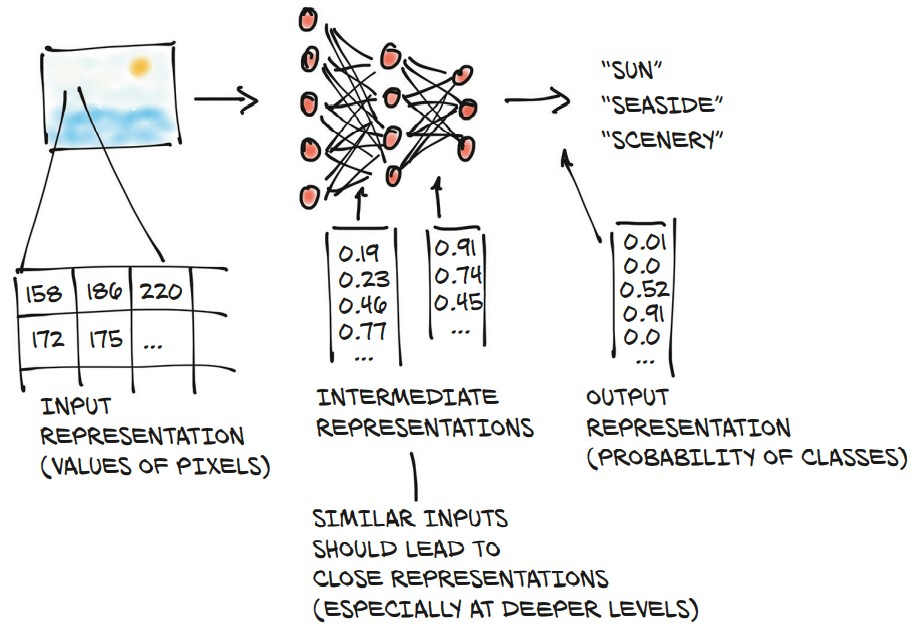

# **¿Cómo PyTorch maneja y almacena datos (por ejemplo entrada, representaciones intermedias y  salida)?**
### Con este fin, PyTorch introduce un tipo de dato: el tensor.

### En el contexto del aprendizaje profundo, ***los tensores se refieren a la generalización de vectores y matrices a un número arbitrario de dimensiones***.
### Otro nombre para el mismo concepto es *matriz multidimensional*. La dimensionalidad de un tensor coincide con el número de índices utilizados para referirse a valores escalares dentro del tensor.

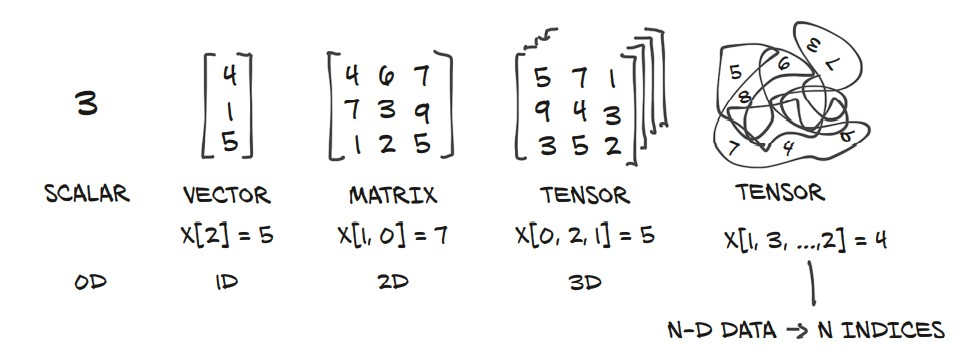

# Creando tensores
### ¿Se puede importar torch? ¿Qué versión de PyTorch tienes?


In [ ]:
import torch
import scipy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sys

In [ ]:
print(f"PyTorch version: {torch.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"SciPy version: {scipy.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Python version: {sys.version_info[0]}.{sys.version_info[1]}.{sys.version_info[2]}")

PyTorch version: 1.12.1+cu113
NumPy version: 1.21.6
SciPy version: 1.7.3
Matplotlib version: 3.2.2
Python version: 3.7.15


In [ ]:
help(torch)

Help on package torch:

NAME
    torch

DESCRIPTION
    The torch package contains data structures for multi-dimensional
    tensors and defines mathematical operations over these tensors.
    Additionally, it provides many utilities for efficient serializing of
    Tensors and arbitrary types, and other useful utilities.
    
    It has a CUDA counterpart, that enables you to run your tensor computations
    on an NVIDIA GPU with compute capability >= 3.0.

PACKAGE CONTENTS
    _C
    _C_flatbuffer
    _VF
    __config__
    __future__
    _appdirs
    _classes
    _decomp (package)
    _deploy
    _dl
    _jit_internal
    _lazy (package)
    _linalg_utils
    _lobpcg
    _lowrank
    _masked (package)
    _meta_registrations
    _namedtensor_internals
    _ops
    _prims (package)
    _python_dispatcher
    _refs (package)
    _six
    _sources
    _storage_docs
    _tensor
    _tensor_docs
    _tensor_str
    _torch_docs
    _utils
    _utils_internal
    _vmap_internals
    amp (p

In [ ]:
x = np.empty((3, 4))
type(x)

numpy.ndarray

In [ ]:
x = torch.empty(3, 4) # valores predefinidos, aloja memoria para el tensor
print(type(x))
print(x)

<class 'torch.Tensor'>
tensor([[3.1242e-35, 0.0000e+00, 8.5479e-44, 4.4842e-44],
        [1.5414e-43, 1.6395e-43, 1.5274e-43, 1.5695e-43],
        [1.6956e-43, 6.4460e-44, 1.4153e-43, 1.5554e-43]])


In [ ]:
zeros = np.zeros((1, 4), dtype=np.float32)
zeros

array([[0., 0., 0., 0.]], dtype=float32)

In [ ]:
zeros = torch.zeros((1, 4), dtype=torch.int16)
print(zeros)

tensor([[0, 0, 0, 0]], dtype=torch.int16)


In [ ]:
# Se puede construir un tensor directamente de algún interable.
# Tal como una lista, tupla

# Tensor de una lista
a = torch.tensor([0, 1, 2])
a

tensor([0, 1, 2])

In [ ]:
print(f"Tensor a: {a}")

Tensor a: tensor([0, 1, 2])


In [ ]:
# Tensor desde una tupla de tuplas
b = ((1.0, 1.1), (1.2, 1.3))
b = torch.tensor(b)

print(f"Tensor b: {b}")


Tensor b: tensor([[1.0000, 1.1000],
        [1.2000, 1.3000]])


In [ ]:
# Tensor desde un array de numpy
c = np.ones(5)
type(c)

numpy.ndarray

In [ ]:
c = torch.tensor(c)
print(f"Tensor c: {c}")

Tensor c: tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


#### Conversión de arreglos tipo NumPy a tensores

In [ ]:
#Algunos constructores de tensores comunes:
# Los argumentos numéricos que pasamos a estos constructores
# determinar la forma del tensor de salida

shape = (2, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.5991, 0.9852, 0.7371],
        [0.0789, 0.9357, 0.8741]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


#### Conversión de un tensor a un arreglo de NumPy

In [ ]:
#Para obtener una matriz NumPy de nuestro tensor:
Mypoints = torch.zeros(3, 4)
Mypoints

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
Mypoints_np = Mypoints.numpy()
print(Mypoints_np)
print(type(Mypoints_np))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
<class 'numpy.ndarray'>


In [ ]:
t = torch.ones(5)
print(f"t: {t}",'\n')

n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.]) 

n: [1. 1. 1. 1. 1.]


In [ ]:
type(Mypoints_np)

numpy.ndarray

In [ ]:
#Por el contrario, se puede obtener un tensor  de una matriz NumPy:
b = torch.from_numpy(Mypoints_np)
print(b)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


In [ ]:
# Siguiendo las ideas anteriores, creamos una lista de listas.
data = [[1, 2], [3, 4]]
# Construimos un tensor a partir de data
x_data = torch.tensor(data)
type(data)

list

In [ ]:
type(x_data)

torch.Tensor

In [ ]:
# Construimos un array a partir de data
np_array = np.array(data)
type(np_array)

numpy.ndarray

In [ ]:
# Construimos otro tensor a partir del array generado de data
x_np = torch.from_numpy(np_array)
type(x_np)

torch.Tensor

In [ ]:
x_np

tensor([[1, 2],
        [3, 4]])

#### Operaciones aritméticas

In [ ]:
# Otro ejemplo
a=np.ones(5)
np.add(a, 1, out=a)
print(a)
b = torch.from_numpy(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [ ]:
a + 3

array([5., 5., 5., 5., 5.])

In [ ]:
a = torch.ones(2, 2)
a

tensor([[1., 1.],
        [1., 1.]])

In [ ]:
b = a.clone()
type(b)

torch.Tensor

In [ ]:
assert b is not a      # different objects in memory...

In [ ]:
print(torch.eq(a, b))  # ...but still with the same contents!

tensor([[True, True],
        [True, True]])


In [ ]:
print(a)
print(b)

tensor([[1., 1.],
        [1., 1.]])
tensor([[1., 1.],
        [1., 1.]])


In [ ]:
print(a)
print(b) # # ...but b is still all ones

tensor([[  1., 561.],
        [  1.,   1.]])
tensor([[1., 1.],
        [1., 1.]])


In [ ]:
a = torch.rand(2, 2, requires_grad=True) # turn on autograd
print(a)

b = a.clone()
print(b) # Tiene el mismo contenido de a

c = a.detach().clone()
print(c)

print(a)

tensor([[0.1280, 0.8633],
        [0.3295, 0.3490]], requires_grad=True)
tensor([[0.1280, 0.8633],
        [0.3295, 0.3490]], grad_fn=<CloneBackward0>)
tensor([[0.1280, 0.8633],
        [0.3295, 0.3490]])
tensor([[0.1280, 0.8633],
        [0.3295, 0.3490]], requires_grad=True)


In [ ]:
if torch.cuda.is_available():
    print('We have a GPU!')
else:
    print('Sorry, CPU only.')

We have a GPU!


## Creando tensores aleatorios y tensores como otros tensores:
También hay constructores que nos permiten construir tensores de acuerdo con los constructores anteriores, pero con dimensiones iguales a otro tensor.

In [ ]:
#.arange() y .linspace() se comportan como esperarías que lo hicieran con numpy.
a_tensor = torch.arange(0, 10, step=1)
a_arrange = np.arange(0, 10, step=1)
print( a_tensor,'\n')
print(f"Numpy array: {a_arrange}\n")

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 

Numpy array: [0 1 2 3 4 5 6 7 8 9]



In [ ]:
b_tensor = torch.linspace(0, 5, steps=11)
b_linspace = np.linspace(0, 5, num=11)
print(b_tensor,'\n')
print(f"Numpy array: {b_linspace}\n")

tensor([0.0000, 0.5000, 1.0000, 1.5000, 2.0000, 2.5000, 3.0000, 3.5000, 4.0000,
        4.5000, 5.0000]) 

Numpy array: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]



In [ ]:
# Constructores para números aleatorios

# Distribución uniforme
a = torch.rand(1, 3)
print(f"Tensor a: {a}\n")
print(f"Shape of tensor: {a.shape}")
print(f"Datatype of tensor: {a.dtype}")
print(f"Device tensor is stored on: {a.device}")


tensor([[0.1919, 0.8264, 0.2677]])
Shape of tensor: torch.Size([1, 3])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [ ]:
# Distribución normal
b = torch.randn(3, 4)
print(f"Tensor b: {b}\n")

Tensor b: tensor([[-0.6912,  1.4977, -0.4735,  1.8551],
        [ 2.2478,  0.2200, -1.0007,  1.0234],
        [-0.6032,  1.7793, -0.9774,  0.8105]])



In [ ]:
# También hay constructores que nos permiten construir
# un tensor de acuerdo con los constructores anteriores, pero con
# dimensiones iguales a otro tensor.
c = torch.zeros_like(a)
d = torch.rand_like(c)

print(f"Tensor c: {c}\n")
print(f"Tensor d: {d}\n")

Tensor c: tensor([[0., 0., 0.]])

Tensor d: tensor([[0.7328, 0.8682, 0.8139]])



In [ ]:
# Otro ejemplo similar
print('Original:\n  ',a,'\n')
x_ones = torch.ones_like(a)
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(a, dtype=torch.float)
print(f"Random Tensor: \n {x_rand} \n")

Original:
   tensor([[0.1919, 0.8264, 0.2677]]) 

Ones Tensor: 
 tensor([[1., 1., 1.]]) 

Random Tensor: 
 tensor([[0.2353, 0.5929, 0.0926]]) 



### Función $\operatorname{ReLU}\left(x\right)=\max\left\{0,x\right\}$ (rectified linear unit)

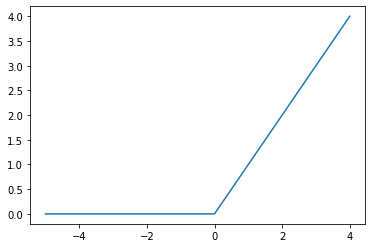

In [ ]:
r = torch.nn.ReLU()

# Creating a Tensor with an array
input = torch.arange(-5, 5)

# Passing the array to relu function
output = r(input)

plt.plot(input, output)

#### Función Sigmoide

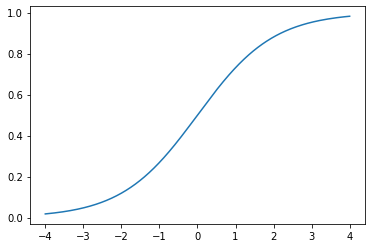

In [ ]:
r = torch.nn.Sigmoid()

# Creating a Tensor with an array
input = torch.arange(-4, 4, 1e-4)

# Passing the array to relu function
output = r(input)

plt.plot(input, output)

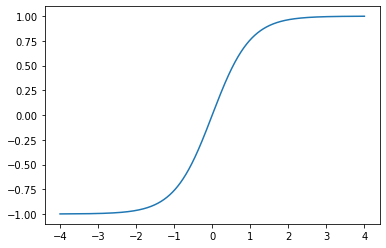

In [ ]:
r = torch.nn.Tanh()

# Creating a Tensor with an array
input = torch.arange(-4, 4, 1e-4)

# Passing the array to relu function
output = r(input)

plt.plot(input, output)

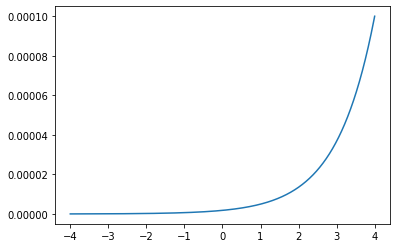

In [ ]:
r = torch.nn.Softmax(dim=0)

# Creating a Tensor with an array
input = torch.arange(-4, 4, 1e-4)

# Passing the array to relu function
output = r(input)

plt.plot(input, output)

#### Red para aproximar la función $\cos\left(x\right)$

In [ ]:
x = 5*torch.rand(30,1) # 30 random numbers in [0,5]
y = torch.cos(x) # análogo a np.sin

In [ ]:
y

tensor([[-0.9901],
        [ 0.7423],
        [-0.0653],
        [-0.4713],
        [ 0.9023],
        [-0.8262],
        [ 0.6433],
        [-0.6770],
        [-0.9137],
        [ 0.2111],
        [-0.7289],
        [-0.3300],
        [ 0.8962],
        [ 0.2548],
        [ 0.4068],
        [-0.4368],
        [ 0.4194],
        [ 0.6493],
        [ 0.9984],
        [-0.1772],
        [ 0.2379],
        [-0.3454],
        [-0.0950],
        [ 0.9224],
        [-0.1801],
        [-0.5593],
        [ 0.2880],
        [-0.3037],
        [ 0.3935],
        [ 0.7092]])

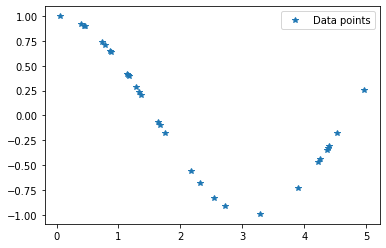

In [ ]:
plt.plot(x,y,'*',label='Data points')
plt.legend()
plt.show()

##### Arquitectura de la red

Una sola entrada, una sola salida, una capa oculta con 5 neuronas y una función de activación

In [ ]:
# ANN
model = torch.nn.Sequential(
    torch.nn.Linear(1,5),
    torch.nn.Sigmoid(),
    torch.nn.Linear(5,1)
    )
print(model)

Sequential(
  (0): Linear(in_features=1, out_features=5, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=5, out_features=1, bias=True)
)


#### Mean Squared Loss
$$
\sum_{i=1}^{N}
\frac{{\left(x_{i}-y_{i}\right)}^{2}}{N}
$$

In [ ]:
loss_fn = torch.nn.MSELoss(reduction='sum') # minimization
print(loss_fn)

MSELoss()


In [ ]:
optimizer = torch.optim.Adam(model.parameters()) # optimizer
print(optimizer)

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


In [ ]:
losses = []
for t in range(10000):
    torch_prediction = model(x)
    loss = loss_fn(torch_prediction,y)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

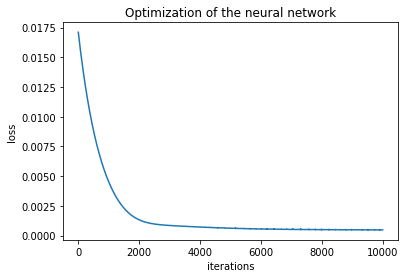

In [ ]:
plt.title('Optimization of the neural network')
plt.plot(losses,label='Reduction of the goal functional')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

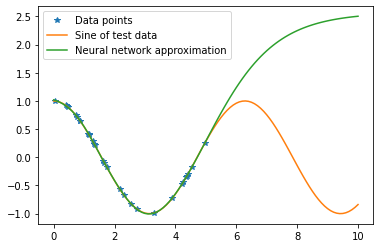

In [ ]:
#print('\nNow the network has been trained and we apply it to test data from the interval [0,10]')
xt = torch.linspace(0,10,101).reshape(101,1)
yt = model(xt)
#plt.title('Performance of the neural network')
plt.plot(x,y,'*',label='Data points')
plt.plot(xt.detach().numpy(),torch.cos(xt).detach().numpy(),label='Sine of test data')
plt.plot(xt.detach().numpy(),yt.detach().numpy(),label='Neural network approximation')
plt.legend()
plt.show()

# Task 1 para ti:
[Enter to solve](https://colab.research.google.com/drive/104UMZmuXnwtNZ9NN1EoOSGvte36ziR8F#scrollTo=aNRC2jtzx_dm)

------------------------------------------------
------------------------------------------------


## Operaciones aritméticas con tensores

In [ ]:
# Podemos realizar operaciones sobre tensores
Mytensor = torch.ones(4, 4)
## Esto calcula la multiplicación  entre dos tensores. y1, y2 tendrán el mismo valor
y1 = Mytensor @ Mytensor.T
y2 = Mytensor.matmul(Mytensor.T)

print(f"tensor.matmul(tensor.T) \n {y2} \n")

print(f"tensor @ tensor.T \n {y1}")


tensor.matmul(tensor.T) 
 tensor([[4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.]]) 

tensor @ tensor.T 
 tensor([[4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.]])


In [ ]:
# Cálculo del producto por elemento
x1=Mytensor.mul(Mytensor)
x2=Mytensor * Mytensor
print(f"tensor.mul(tensor) \n {x1} \n")

print(f"tensor * tensor \n {x2}")

tensor.mul(tensor) 
 tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [ ]:
a = torch.ones(5, 3)
b = torch.rand(5, 3)
c = torch.empty(5, 3)
d = torch.empty(5, 3)

# esto solo funciona si c y d ya existen
torch.add(a, b, out=c)
print(f'c={c}\n')

# Cálculo del producto por elemento
torch.multiply(a, b, out=d)
print(f'd={d}\n')


c=tensor([[1.5540, 1.1164, 1.9432],
        [1.2548, 1.8722, 1.1766],
        [1.9857, 1.5031, 1.3887],
        [1.5697, 1.4962, 1.4119],
        [1.5671, 1.3624, 1.2917]])

d=tensor([[0.5540, 0.1164, 0.9432],
        [0.2548, 0.8722, 0.1766],
        [0.9857, 0.5031, 0.3887],
        [0.5697, 0.4962, 0.4119],
        [0.5671, 0.3624, 0.2917]])



 **Nota**: Tenga en cuenta que *.empty()* no devuelve ceros, sino números aparentemente aleatorios. A diferencia de .zeros(), que inicializa los elementos del tensor con ceros, *.empty() solo asigna la memoria*. Por lo tanto, es un poco más rápido si solo busca crear un tensor.

In [ ]:
# Otro ejemplo de add
print(Mytensor, "\n")
Mytensor.add_(5)
print(Mytensor)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]) 

tensor([[6., 6., 6., 6.],
        [6., 6., 6., 6.],
        [6., 6., 6., 6.],
        [6., 6., 6., 6.]])


In [ ]:
#Unión de tensores:
#para concatenar una secuencia de tensores a lo largo de una dimensión determinada.
tensor = torch.ones(4, 4)
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])


# Task 2 para ti:
[Enter to solve](https://colab.research.google.com/drive/104UMZmuXnwtNZ9NN1EoOSGvte36ziR8F#scrollTo=aNRC2jtzx_dm)

------------------------------------------------
------------------------------------------------

## Indexación de tensores

In [ ]:
tensor = torch.ones(4, 4)
print(tensor)
tensor[:,1] = 5
print(tensor)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[1., 5., 1., 1.],
        [1., 5., 1., 1.],
        [1., 5., 1., 1.],
        [1., 5., 1., 1.]])


**La esencia de los tensores**

Las listas de Python o tuplas de números son colecciones de objetos de Python que se asignan individualmente en la memoria,. Los tensores de PyTorch o las matrices NumPy, son vistas sobre (típicamente) bloques de memoria contiguos que contienen tipos numéricos.
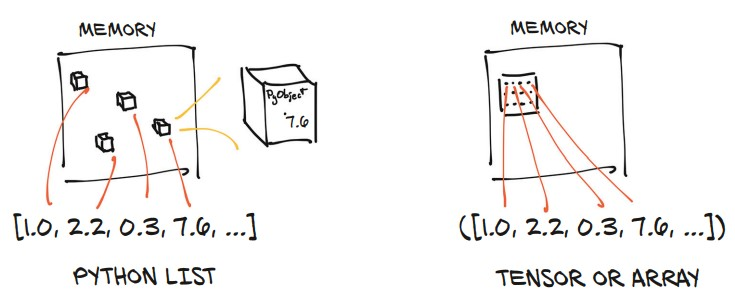

Digamos que tenemos una lista de coordenadas que nos gustaría usar para representar un objeto geométrico: tal vez un triángulo 2D con vértices en las coordenadas (4, 1), (5, 3) y (2, 1). En lugar de tener coordenadas como números en una lista de Python, podemos usar un tensor unidimensional almacenando Xs en los índices pares e Ys en los índices impares,
como esto:


In [ ]:
points = torch.zeros(6)
# Sobrescribimos esos ceros con los valores que realmente queremos.
points[0] = 4.0
points[1] = 1.0
points[2] = 5.0
points[3] = 3.0
points[4] = 2.0
points[5] = 1.0
points

tensor([4., 1., 5., 3., 2., 1.])

También podemos pasar una lista de Python al constructor, con el mismo efecto:

In [ ]:
points = torch.tensor([4.0, 1.0, 5.0, 3.0, 2.0, 1.0])
points

tensor([4., 1., 5., 3., 2., 1.])

Para obtener las coordenadas del primer punto, hacemos lo siguiente:

In [ ]:
float(points[0]), float(points[1])

(4.0, 1.0)

Esto está bien, aunque sería práctico que el primer índice se refiriera a puntos 2D individuales en lugar de coordenadas de puntos. Para esto, podemos usar un tensor 2D:

In [ ]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
points

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])

Podemos preguntarle al tensor por el tamaño del tensor a lo largo de cada dimensión y acceder a un elemento individual en el tensor usando dos índices.




In [ ]:
points.shape

torch.Size([3, 2])

In [ ]:
points[1, 1]

tensor(3.)

Esto devuelve la coordenada *y* del punto cero en nuestro conjunto de datos. Podemos acceder al primer elemento del tensor:

In [ ]:
points[0]

tensor([4., 1.])

In [ ]:
# Todas las filas después de la primera; implicitamente todas las columnas
print(points,'\n')
print(points[1:],'\n')

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]]) 

tensor([[5., 3.],
        [2., 1.]]) 



In [ ]:
# Todas las filas después de la primera; todas las columnas
print(points,'\n')
print(points[1:, :],'\n')

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]]) 

tensor([[5., 3.],
        [2., 1.]]) 



In [ ]:
# Todas las filas después de la primera; primera columna
print(points,'\n')
print(points[1:, 0],'\n')

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]]) 

tensor([5., 2.]) 



In [ ]:
# Agrega una dimensión de tamaño 1, al igual que unsqueeze
print(points,'\n')
print(points[None],'\n')

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]]) 

tensor([[[4., 1.],
         [5., 3.],
         [2., 1.]]]) 



Métodos flatten, reshape y squeeze

**.flatten():** es común tener que expresar datos 2D en formato 1D.

**.reshape()**: también es común tener que expresar un tensor 1D en un tensor 2D.

**.squeeze():** para comprimir tensores a lo largo de sus dimensiones singleton.

In [ ]:
z = torch.arange(12).reshape(6, 2)
print(f"Original z: \n {z}\n")

# 2D -> 1D
z = z.flatten()
print(f"Flattened z: \n {z}\n")

# and back to 2D
z = z.reshape(3, 4)
print(f"Reshaped (3x4) z: \n {z}\n")

Original z: 
 tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11]])

Flattened z: 
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

Reshaped (3x4) z: 
 tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])



In [ ]:
x = torch.randn(1, 10)
#imprimir el elemento cero del tensor no nos dará el primer número

print(x.shape,'\n')
print(f"x[0]: {x[0]}")


torch.Size([1, 10]) 

x[0]: tensor([ 0.0652,  1.6356,  0.4740,  0.3094, -0.3455,  0.5987,  0.0582,  2.0118,
         1.0038, -0.1882])


In [ ]:
# Deshagámonos de esa dimensión singleton y veamos qué sucede ahora
x = x.squeeze(0)
print(x.shape)
print(f"x[0]: {x[0]}")

torch.Size([10])
x[0]: 0.06521068513393402


**torch.numel():** es una manera fácil de encontrar el número de elementos en un tensor.

In [ ]:
torch.numel(x)

10

# Task 3 para ti:
[Enter to solve](https://colab.research.google.com/drive/104UMZmuXnwtNZ9NN1EoOSGvte36ziR8F#scrollTo=aNRC2jtzx_dm)

------------------------------------------------
------------------------------------------------

## Ejemplo de clasificación

In [ ]:
# We have a data set of vehicles. For each of them we know
# (velocity, noise, 1=car or 0=bike)
dataset = torch.tensor([[42., 68, 1],[8 , 46, 0],[28, 50, 0],[18, 75, 1],
              [23, 50, 0],[18, 60, 1],[24, 68, 1],[28, 73, 1],
              [43, 84, 1],[15, 53, 0],[23, 55, 0],[14, 45, 0],
              [14, 73, 1],[19, 48, 0]])
Ndata = dataset.shape[0] # number of data points
print(Ndata)

14


In [ ]:
cars = dataset.detach().numpy()[dataset.detach().numpy()[:,2]==1][:,:2]
bikes = dataset.detach().numpy()[dataset.detach().numpy()[:,2]==0][:,:2]
# print(cars)
# print(bikes)

In [ ]:

# we split the data set into input (x) and output (y)
#
# WARNING: It is important that x and y are still 2-dimensional
# tensors and not vectors! Try
#    y = dataset[:,2]
# instead of
#    y = dataset[:,2:]
# and have a look at the error message!
x = dataset[:,:2]
y = dataset[:,2:]
print(x)
print(y)

tensor([[42., 68.],
        [ 8., 46.],
        [28., 50.],
        [18., 75.],
        [23., 50.],
        [18., 60.],
        [24., 68.],
        [28., 73.],
        [43., 84.],
        [15., 53.],
        [23., 55.],
        [14., 45.],
        [14., 73.],
        [19., 48.]])
tensor([[1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.]])


In [ ]:
# We define a network model
model = torch.nn.Sequential(
                    torch.nn.Linear(2,1),
                    torch.nn.Sigmoid(),
                    )

In [ ]:
# We define the parameters for the optimizer
maxiter,tol,printstep,learningrate = 50000,1.e-4,10000,2.e-3

In [ ]:
# This is the loss-function: mean squared errors
loss_fn = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(),lr=learningrate,weight_decay=0)

In [ ]:
losses = []  # array to store the proress of the optimizer
for t in range(maxiter+1): # Main optimization loop
    torch_prediction = model(x)          # evaluate the model in the data points
    loss = loss_fn(torch_prediction,y)   # compute the loss function
    losses.append(loss.item()/np.sqrt(Ndata))
    if t%printstep == 0:
        print(t,losses[-1],sep='\t')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if loss.item()/np.sqrt(Ndata)<tol:
        break

0	1.6869020563202786
10000	0.08746258055631807
20000	0.016382739323144713
30000	0.0026532103522373257
40000	0.0004075070524879653


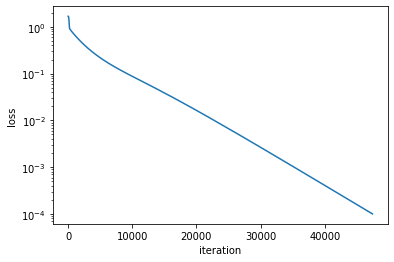

Network is trained with final loss 9.99960105960304e-05


In [ ]:
plt.semilogy(losses)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()
print('Network is trained with final loss {0}'.format(losses[-1]))

In [ ]:
### get model parameters to determine plane
md = []
for p in model.parameters():
    md.append(p.data.numpy())

In [ ]:
print(md)

[array([[-0.41848707,  1.4296813 ]], dtype=float32), array([-73.90884], dtype=float32)]


In [ ]:
weights = md[0].flatten()
bias    = md[1].flatten()

In [ ]:
xp = [0,50]
yp = [-bias[0]/weights[1],(-bias[0]-weights[0]*xp[1])/weights[1]]

In [ ]:
print('Model parameters: w = {0}\t b={1}'.format(weights,bias))

Model parameters: w = [-0.41848707  1.4296813 ]	 b=[-73.90884]


In [ ]:
# visualize network result
nxy = 100
xx,yy = np.meshgrid(np.linspace(0,50,nxy).astype(np.float32),np.linspace(40,90,nxy).astype(np.float32))
xxyy = np.transpose(np.stack([xx.flatten(),yy.flatten()]))

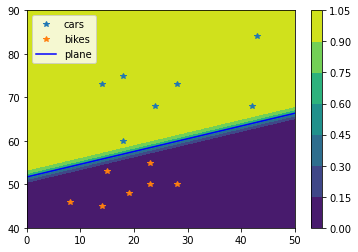

In [ ]:
z = model(torch.from_numpy(xxyy)).detach().numpy().reshape(nxy,nxy)
plt.contourf(xx, yy, z)
plt.colorbar()

plt.plot(cars[:,0],cars[:,1],'*',label='cars')
plt.plot(bikes[:,0],bikes[:,1],'*',label='bikes')
plt.plot(xp,yp,'-b',label='plane')
plt.legend()
plt.savefig('classification.png',density=300)
plt.show()

#### Modelo de un muelle (resorte)

\begin{aligned}
m x^{\prime\prime} + \mu x^{\prime} + \lambda x &= mg \\
x^{\prime\prime} + \frac{\mu}{mx^{\prime}} + \frac{\lambda}{m x} &= g
\end{aligned}

In [ ]:
def g(t):
    return 1.0

In [ ]:
# u''(t) + mu * u'(t) +  l * (u(t)-1) = g(t)
# x1' = x2
# x2' = - mu x2 - l x1 + l * 1 + g
def fkt(t,x,m,mu,lam):
    return np.array([x[1], g(t) - mu/m * x[1] - lam/m * x[0]])

In [ ]:
def rk4(t,h,x,m,mu,lam):
    k1 = fkt(t,x,m,mu,lam)
    k2 = fkt(t+0.5*h,x+0.5*h*k1,m,mu,lam)
    k3 = fkt(t+0.5*h,x+0.5*h*k2,m,mu,lam)
    k4 = fkt(t+h,x+h*k3,m,mu,lam)
    return x+h/6.*(k1+2.*k2+2.*k3+k4)

In [ ]:
def G(t,h,x,m,mu,lam):
    return rk4(t,h,x,m,mu,lam)

In [ ]:
def heun(t,h,x,m,mu,lam):
    k1 = fkt(t,x,m,mu,lam)
    k2 = fkt(t+h,x+h*k1,m,mu,lam)
    return x+h/2.*(k1+k2)

In [ ]:
def eeuler(t,h,x,m,mu,lam):
    k1 = fkt(t,x,m,mu,lam)
    return x + h * k1

In [ ]:
def ieuler(t,h,x,m,mu,lam):
    k1 = fkt(t,x,m,mu,lam)
    return x + h * k1

In [ ]:
def error(X,Y):
    return np.linalg.norm(X-Y,axis=1)

In [ ]:
class ResNet(torch.nn.Module):
    def __init__(self, module):
        super().__init__()
        self.module = module

    def forward(self, inputs):
        return self.module(inputs) + inputs[:,:2]

In [ ]:
class ResNetH(torch.nn.Module):
    def __init__(self, module):
        super().__init__()
        self.module = module

    def forward(self, inputs):
        return self.module(inputs) + inputs[:,2:3] * inputs[:,:2]

In [ ]:
loss_fn = torch.nn.MSELoss(reduction='sum')

In [ ]:
def train_network(model,trainX,trainY,maxiter=50000,tol=1.e-5,printstep=100,learn=0.001):
    optimizer = torch.optim.Adam(model.parameters(),lr=learn,weight_decay=0)

    trainN = trainX.shape[0]
    print(trainN)
    losses = []
    for t in range(maxiter+1):
        torch_prediction = model(trainX)
        loss = loss_fn(torch_prediction,trainY)
        losses.append(loss.item())
        if t%printstep == 0:
            print(t,loss.item()/np.sqrt(trainN),sep='\t')
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if loss.item()/np.sqrt(trainN)<tol:
            break
    return losses

In [ ]:
lam = 0.5    # spring constant
mu  = 0.01   # damping parameter
m  = 1.0     # mass of the spring

In [ ]:
def predict(x, h, n, m,mu,lam):
    for j in range(n):
        x = rk4(0,h,x,m,mu,lam)
    return x

In [ ]:
hnet = 0.5   # step size for the neural network

In [ ]:
hdata = 0.01 # step size for the rk4 data generation
nh = int(1.e-10+hnet/hdata)

In [ ]:
datarange = np.array([[0,4],[-2,2]])
Ndata = 1000 # number of data samples
print('Creating {0} data points'.format(Ndata))
maxiter,printstep = 1000,100
yt = torch.zeros(Ndata,2)
xt = torch.from_numpy((datarange[:,0]+(datarange[:,1]-datarange[:,0])*np.random.rand(Ndata,2)).astype(np.float32))
for i in range(Ndata):
    yt[i,:] = predict(xt[i,:],hdata,nh,m,mu,lam)

Creating 1000 data points


In [ ]:
print('Training the model')
model = torch.nn.Sequential(
    ResNet(torch.nn.Sequential(
                torch.nn.Linear(2,5),
                torch.nn.Sigmoid(),
                torch.nn.Linear(5,5),
                torch.nn.Sigmoid(),
                torch.nn.Linear(5,2),
                )
        )
    )

Training the model


0	24.985286267825465
1000	2.248077789828605
2000	0.24342500050542448
3000	0.09865689210210779
4000	0.03428641037800291
5000	0.013122060053483358
6000	0.008079028162396919
7000	0.005602668854905855
8000	0.0038039361932589557
9000	0.002519485475404779
10000	0.0016680540727091976
11000	0.001128430127513522
12000	0.0008148381746749589
13000	0.000637608265858169
14000	0.0005255461877549217
15000	0.00045563126723320677
16000	0.00040526383328779846
17000	0.00036683077148876855
18000	0.000337512560352395
19000	0.0003117168662063078
20000	0.00029009220019648703
21000	0.0002695718879991987
22000	0.0002539109622948978
23000	0.00030087695233453957
24000	0.0002278901593865808
25000	0.00021706813700078816


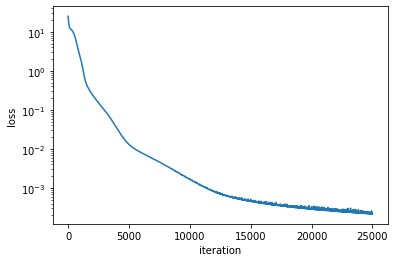

In [ ]:
maxiter,tol,printstep,learningrate = 25000,1.e-5,1000,1.e-3

loss_fn = torch.nn.MSELoss(reduction='sum')
losses = []
optimizer = torch.optim.Adam(model.parameters(),lr=learningrate,weight_decay=0)
for t in range(maxiter+1):
    torch_prediction = model(xt)
    loss = loss_fn(torch_prediction,yt)
    losses.append(loss.item()/np.sqrt(Ndata))
    if t%printstep == 0:
        print(t,losses[-1],sep='\t')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if loss.item()/np.sqrt(Ndata)<tol:
        break

plt.semilogy(losses)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

In [ ]:
print('Network is trained with final loss {0}'.format(losses[-1]))

Network is trained with final loss 0.00021706813700078816


Enter initial value. stop, when |x0|>10 


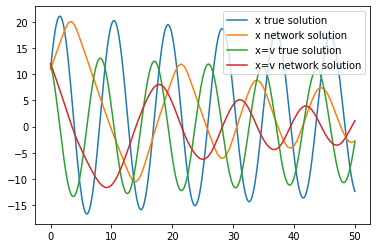

In [ ]:
N = 100    # Number of network steps
T = hnet*N # final time
Nr = int(1.e-8+T/hdata) # Number of reference steps

xref = np.zeros((Nr+1,2))
xnet = np.zeros((N+1,2))


print('Enter initial value. stop, when |x0|>10 ')
xref[0,0] = 11 #float(input('Initial Position: '))
xref[0,1] = 12 #float(input('Initial Velocity: '))
#if np.linalg.norm(xref[0,:])>10:
#  break

xnet[0,:] = xref[0,:]

for i in range(Nr):
    xref[i+1,:] = rk4(0,hdata,xref[i,:],m,mu,lam)

for i in range(N):
    xnet[i+1,:] = model(torch.from_numpy(xnet[i:i+1,:].astype(np.float32))).detach().numpy()

plt.plot(np.linspace(0,T,Nr+1),xref[:,0],label='x true solution')
plt.plot(np.linspace(0,T,N+1),xnet[:,0],label='x network solution')
plt.plot(np.linspace(0,T,Nr+1),xref[:,1],label='x''=v true solution')
plt.plot(np.linspace(0,T,N+1),xnet[:,1],label='x''=v network solution')
plt.legend()
plt.show()